# <font style="color:red">Python</font>
---
### Asignación automatica de tipos de variables
En Python y en R no es necesario declarar explícitamente el tipo de las variables. El intérprete trata de inferir el tipo de las variables según se usan, aunque ambos intérpretes funcionan un poco distinto.

In [122]:
%version_information numpy, pandas, Bio

Software versions
Python 2.7.10 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 4.0.0
OS Linux 2.6.32 504.el6.x86_64 x86_64 with centos 6.6 Final
numpy 1.9.3
pandas 0.16.2
Bio 1.65
Fri Oct 23 09:44:30 2015 COT

In [132]:
%magic

In [148]:
%%script bash
cd data
unzip -o sampledata.zip

Archive:  sampledata.zip
  inflating: sampledata.csv          


In [149]:
!ls data

A0PQ23.fasta		O56773.fasta   P0C569.fasta    sampledata.zip
dengue_NC_001477.fasta	opuntia.dnd    Q5VKP1.fasta
LC-100.fq		opuntia.fasta  Q9CD83.fasta
NC_005816.gb		P06747.fasta   sampledata.csv


las operaciones tienen semántica distinta para distintos tipos de datos. Fíjate en el ejemplo siguiente. ¿Por qué el resultado de las dos últimas divisiones no es el mismo?

In [1]:
a = 10
b = 3
c = 3.
d = "hola"
print type(a), type(b), type(c), type(d)

print "a =",a,"; b =",b, "; c =",c
print "a/b =", a/b
print "a/c =", a/c

<type 'int'> <type 'int'> <type 'float'> <type 'str'>
a = 10 ; b = 3 ; c = 3.0
a/b = 3
a/c = 3.33333333333


## Matrices y vectores

Con la librería `numpy` se trabaja con matrices de forma natural. Fíjate cómo se declaran y cómo descubrimos sus dimensiones.

In [50]:
import numpy as np
v = np.array([2,3,4,5,6,7,3,12])
print v[0]
print v[1:3]
print v[-1]
print "v shape", v.shape
print "v elems", v.shape[0]

print "--"
a = np.array([[1,2,3,4,5],
              [5,4,3,2,1],
              [9,8,7,6,5],
              [7,6,5,6,7],
              [2,2,2,3,3],
              [4,3,4,3,4],
              [5,1,1,4,1]])
print "a shape", a.shape
print "a rows", a.shape[0]
print "a cols", a.shape[1]



2
[3 4]
12
v shape (8,)
v elems 8
--
a shape (7, 5)
a rows 7
a cols 5


Con la notación de índices accedemos a columas o filas enteras, rangos de columnas o filas, elementos individuales o porciones de una matriz o un vector.

In [4]:
print "una fila        " ,a[2]
print "una fila        ",a[2,:]
print "una columna     ",a[:,2]
print "un elemento     ",a[2,2]
print "varias filas    \n",a[2:5]
print "varias columnas \n",a[:,1:3]
print "una porcion     \n",a[2:5,1:3]


una fila         [9 8 7 6 5]
una fila         [9 8 7 6 5]
una columna      [3 3 7 5 2 4 1]
un elemento      7
varias filas    
[[9 8 7 6 5]
 [7 6 5 6 7]
 [2 2 2 3 3]]
varias columnas 
[[2 3]
 [4 3]
 [8 7]
 [6 5]
 [2 2]
 [3 4]
 [1 1]]
una porcion     
[[8 7]
 [6 5]
 [2 2]]


Muchas funciones de la librería `numpy` operan sobre una matriz completa, o de forma separada por columnas o filas según el valor del argumento `axis`.

In [5]:
print "suma total", np.sum(a)
print "suma eje 0", np.sum(a, axis=0)
print "suma eje 1", np.sum(a, axis=1)
print "promedio total", np.mean(a)
print "promedio eje 0", np.mean(a, axis=0)
print "promedio eje 1", np.mean(a, axis=1)

suma total 138
suma eje 0 [33 26 25 28 26]
suma eje 1 [15 15 35 31 12 18 12]
promedio total 3.94285714286
promedio eje 0 [ 4.71428571  3.71428571  3.57142857  4.          3.71428571]
promedio eje 1 [ 3.   3.   7.   6.2  2.4  3.6  2.4]


Las matrices en Python pueden tener un número arbitrario de dimensiones y podemos acceder a submatrices en la dirección o dimensión que queramos.

In [6]:
m = np.random.randint(10, size=(3,3,3))
print "Matrix 3D completa\n", m
print "---\n", m[0,:,:]
print "---\n", m[1,:,:]
print "---\n", m[:,0,:]
print "---\n", m[:,0,0]
print "---\n", np.mean(m, axis=2)


Matrix 3D completa
[[[1 5 6]
  [3 8 5]
  [1 2 7]]

 [[4 6 2]
  [1 2 1]
  [5 2 7]]

 [[6 8 6]
  [3 9 5]
  [2 2 3]]]
---
[[1 5 6]
 [3 8 5]
 [1 2 7]]
---
[[4 6 2]
 [1 2 1]
 [5 2 7]]
---
[[1 5 6]
 [4 6 2]
 [6 8 6]]
---
[1 4 6]
---
[[ 4.          5.33333333  3.33333333]
 [ 4.          1.33333333  4.66666667]
 [ 6.66666667  5.66666667  2.33333333]]


## Generación de matrices y vectores

In [7]:
print "matrix identidad\n", np.eye(3)
print "vector de ceros", np.zeros(4)
print "matriz de ceros\n", np.zeros((3,2))
print "matriz de unos\n", np.ones((2,3))
print "vector rango", np.arange(10)
print "vector rango", np.arange(5,10)
print "vector espacio lineal", np.linspace(-10,5,7)
print "matriz aleatoria según distribución uniforme [0,1]\n", np.random.random(size=(3,5))
print "vector aleatorio de enteros entre 0 y 5", np.random.randint(5, size=10)

matrix identidad
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
vector de ceros [ 0.  0.  0.  0.]
matriz de ceros
[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
matriz de unos
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
vector rango [0 1 2 3 4 5 6 7 8 9]
vector rango [5 6 7 8 9]
vector espacio lineal [-10.   -7.5  -5.   -2.5   0.    2.5   5. ]
matriz aleatoria según distribución uniforme [0,1]
[[ 0.12558395  0.81378444  0.26223676  0.45904138  0.15090495]
 [ 0.69983933  0.45163302  0.5893617   0.7529995   0.00866317]
 [ 0.71339887  0.26607104  0.79347745  0.62850461  0.04164585]]
vector aleatorio de enteros entre 0 y 5 [0 4 1 1 0 4 2 0 1 4]


## Operaciones vectorizadas

In [8]:
v = np.array([10,12,13,15,20])
print v
print v+1
print v*2
print v.dot(v)

[10 12 13 15 20]
[11 13 14 16 21]
[20 24 26 30 40]
1038


In [9]:
print "A", range(10)
print "B", np.linspace(0,10,5)

A [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
B [  0.    2.5   5.    7.5  10. ]


In [10]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[6,5,4],[3,2,1]])
print "a+b\n",a+b
print "a**2\n", a**2
print "a*b\n",a*b
print "a x b'\n",a.dot(b.T)
print "a' x b\n",a.T.dot(b)


a+b
[[7 7 7]
 [7 7 7]]
a**2
[[ 1  4  9]
 [16 25 36]]
a*b
[[ 6 10 12]
 [12 10  6]]
a x b'
[[28 10]
 [73 28]]
a' x b
[[18 13  8]
 [27 20 13]
 [36 27 18]]


Las operaciones vectorizadas también funcionan con expresiones _booleanas_. Fíjate cómo se indexa un vector con una expresión booleana para seleccionar un conjunto de elementos.

In [11]:
a = np.array([1,8,4,10,-4,5])
print "posiciones en a >4:", a>4
print "elementos de a >4:",a[a>4]


posiciones en a >4: [False  True False  True False  True]
elementos de a >4: [ 8 10  5]


In [119]:
def myfunc(a, b):
    if a > b:
        return a - b
    else:
        return a + b
vfunc = np.vectorize(myfunc)

print vfunc([1, 2, 3, 4], 2)
print vfunc([1, 2, 3, 4],[4, 3, 2, 1])

[3 4 1 2]
[5 5 1 3]


## Funciones y estructuras

Python es un lenguaje **indentado**, no usa corchetes para delimitar el alcance de las estructuras de programación sino que se fija en los **cambios de indentación**. 

No se declara el tipo de los argumentos de las funciones. La semática de la implementación ha de estar preparada para funcionar con los tipos de datos que quieres.

In [12]:
def funcion_1(a,b):
    r = a**2
    return r+b

def greatest(a,b):
    if a>b:
        return a
    else:
        return b

m1 = np.array([[3,4],[1,1]])
m2 = np.array([[5,6],[0,0]])
print funcion_1 (10.4,2)
print funcion_1 (10.4, np.array([2,4]))
print funcion_1 (m1,m2)
print greatest(10,2)

110.16
[ 110.16  112.16]
[[14 22]
 [ 1  1]]
10


Podemos definir valores por defecto para los argumentos de las funciones y llamarlas usando explícitamente el nombre de los argumentos. Además, las funciones pueden devolver varios valores.

In [13]:
def f_power(x, p=2):
    return x**p

def f_powers(x, p1=2, p2=3):
    return x**p1, x**p2

print f_power(4)
print f_power(4,3)
print f_powers(4, p1=3)
xp1, xp2 = f_powers(4, p2=4, p1=3)
print "power1",xp1, "power2", xp2

16
64
(64, 64)
power1 64 power2 256


## Diccionarios

Los diccionarios son listas de asociaciones entre objetos (como _hashes_ en Java)

In [14]:
d = {"i1": 16, "nombre": "haskel", "edad": 32}
print d
print d.keys()
print d["nombre"], d["edad"]
for k in d.keys():
    print d[k]

{'i1': 16, 'nombre': 'haskel', 'edad': 32}
['i1', 'nombre', 'edad']
haskel 32
16
haskel
32


## Expresiones compactas

Fíjate cómo las siguientes expresiones son equivalentes:

In [15]:
a=15
if a > 10:
    s = "mayor que 10"
else:
    s = "menor que 10"

print s

mayor que 10


In [16]:
a = 5
s = "mayor que 10" if a > 10 else "menor que 10"
print s

menor que 10


In [17]:
r = []
for i in range(10):
    r.append("el numero "+str(i))
print r

['el numero 0', 'el numero 1', 'el numero 2', 'el numero 3', 'el numero 4', 'el numero 5', 'el numero 6', 'el numero 7', 'el numero 8', 'el numero 9']


In [18]:
r = ["el numero "+str(i) for i in range(10)]
print r

['el numero 0', 'el numero 1', 'el numero 2', 'el numero 3', 'el numero 4', 'el numero 5', 'el numero 6', 'el numero 7', 'el numero 8', 'el numero 9']


### Mapping expressions to data

In [120]:
a = np.random.randint(10, size=20)
b = np.random.randint(10, size=(10,2))
def my_op (x):
    return x**2+1

am = map(my_op, a)
bm = map(my_op, b)

print type(a), a
print type(am), am
am = np.array(am)
print type(am), am
print "--"

print type(b), b
print type(bm), bm
bm = np.array(bm)
print type(bm), bm


<type 'numpy.ndarray'> [8 1 1 8 8 2 5 1 7 0 6 8 9 1 8 8 7 8 0 0]
<type 'list'> [65, 2, 2, 65, 65, 5, 26, 2, 50, 1, 37, 65, 82, 2, 65, 65, 50, 65, 1, 1]
<type 'numpy.ndarray'> [65  2  2 65 65  5 26  2 50  1 37 65 82  2 65 65 50 65  1  1]
--
<type 'numpy.ndarray'> [[4 8]
 [4 3]
 [6 4]
 [9 5]
 [7 7]
 [7 8]
 [6 0]
 [4 1]
 [4 3]
 [7 4]]
<type 'list'> [array([17, 65]), array([17, 10]), array([37, 17]), array([82, 26]), array([50, 50]), array([50, 65]), array([37,  1]), array([17,  2]), array([17, 10]), array([50, 17])]
<type 'numpy.ndarray'> [[17 65]
 [17 10]
 [37 17]
 [82 26]
 [50 50]
 [50 65]
 [37  1]
 [17  2]
 [17 10]
 [50 17]]


## Gráficos

Con **plt.plot** pintamos puntos conectados, con **plt.scatter" pintamos puntos sueltos

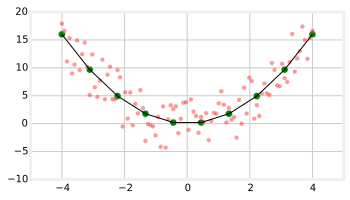

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize=(5,3))
x = np.linspace(-4,4,10)
plt.plot(x, x**2, color="black", linewidth=1)
plt.scatter(x, x**2, c="green", s=50)
x_r = np.linspace(-4,4,100)
x_ruido = x_r**2 + (np.random.random(x_r.shape)-0.5)*10
plt.scatter(x_r,x_ruido, c="red", alpha=0.4)

## Dataframes (Pandas)

In [150]:
import pandas as pd
import numpy as np

In [151]:
d = pd.read_csv("data/sampledata.csv")

In [152]:
d.iloc[:10,]

,id,first_name,last_name,email,country,ip_address,longitude,latitude,age,score
0,1,Sandra,Sims,ssims0@microsoft.com,Armenia,63.84.115.63,44.43054,40.14493,44,0.62
1,2,Anna,Bishop,abishop1@mtv.com,China,204.108.246.11,118.29169,29.67594,90,0.22
2,3,Virginia,Rodriguez,vrodriguez2@so-net.ne.jp,Portugal,88.65.157.43,-8.63330,41.40000,39,0.33
3,4,Julia,Stanley,jstanley3@abc.net.au,China,76.197.170.103,102.19379,38.50062,NaN,0.64
4,5,Jacqueline,Gutierrez,jgutierrez4@shinystat.com,Poland,159.13.71.38,18.54003,54.17062,14,0.50
5,6,Nicole,Little,nlittle5@latimes.com,Panama,235.246.1.116,-78.13774,8.40693,10,0.30
6,7,Terry,Fox,tfox6@squarespace.com,Iran,81.219.197.208,55.49164,37.38071,89,0.33
7,8,Jeremy,Parker,jparker7@gnu.org,China,17.207.110.163,110.71266,22.01041,60,0.55
8,9,Kenneth,Walker,kwalker8@nba.com,Slovenia,117.248.31.17,13.97028,45.68472,no disponible,0.50
9,10,Willie,Brown,wbrown9@boston.com,Ethiopia,253.51.12.171,42.80000,9.35000,17,0.41


In [153]:
d.describe()

,id,longitude,latitude,score
count,1000.000000,999.000000,999.000000,1000.000000
mean,500.500000,46.831119,24.273880,0.501290
std,288.819436,70.556083,24.272596,0.103403
min,1.000000,-149.333330,-53.787690,0.180000
25%,250.750000,7.046050,8.135695,0.430000
50%,500.500000,42.174440,29.819050,0.510000
75%,750.250000,112.349640,43.186925,0.570000
max,1000.000000,175.496340,72.786840,0.830000


In [154]:
d.iloc[2,2]

'Rodriguez'

In [155]:
d.iloc[[1,3,5],]

,id,first_name,last_name,email,country,ip_address,longitude,latitude,age,score
1,2,Anna,Bishop,abishop1@mtv.com,China,204.108.246.11,118.29169,29.67594,90,0.22
3,4,Julia,Stanley,jstanley3@abc.net.au,China,76.197.170.103,102.19379,38.50062,NaN,0.64
5,6,Nicole,Little,nlittle5@latimes.com,Panama,235.246.1.116,-78.13774,8.40693,10,0.30


In [156]:
d.iloc[range(10),][["last_name", "country", "score"]]

,last_name,country,score
0,Sims,Armenia,0.62
1,Bishop,China,0.22
2,Rodriguez,Portugal,0.33
3,Stanley,China,0.64
4,Gutierrez,Poland,0.50
5,Little,Panama,0.30
6,Fox,Iran,0.33
7,Parker,China,0.55
8,Walker,Slovenia,0.50
9,Brown,Ethiopia,0.41


In [157]:
d[d.age==55]

,id,first_name,last_name,email,country,ip_address,longitude,latitude,age,score


In [158]:
d[d.age=='55']

,id,first_name,last_name,email,country,ip_address,longitude,latitude,age,score
18,19,Jimmy,Robertson,jrobertsoni@thetimes.co.uk,Tajikistan,184.90.118.60,68.44668,37.56702,55,0.60
72,73,Michael,Powell,mpowell20@youtube.com,China,232.233.196.224,120.21400,27.32734,55,0.59
266,267,Gerald,Butler,gbutler7e@google.fr,Philippines,149.199.214.71,121.41470,14.12840,55,0.55
367,368,Philip,Harvey,pharveya7@wsj.com,Portugal,188.30.85.41,-8.16630,37.86690,55,0.18
381,382,Joan,Oliver,joliveral@chicagotribune.com,Russia,98.144.120.116,38.40172,54.03481,55,0.37
418,419,Paula,Fowler,pfowlerbm@apache.org,Philippines,221.234.139.145,120.65190,17.56470,55,0.43
685,686,Jesse,Freeman,jfreemanj1@wikia.com,Iran,66.31.71.144,60.21430,26.22580,55,0.32
853,854,Willie,Ross,wrossnp@networkadvertising.org,Indonesia,90.176.105.5,125.18950,1.45697,55,0.53
897,898,Julie,Mason,jmasonox@wikia.com,Libya,229.225.235.75,12.72778,32.75222,55,0.46


In [159]:
d[np.logical_or(d.age=="55", d.age=="44")]

,id,first_name,last_name,email,country,ip_address,longitude,latitude,age,score
0,1,Sandra,Sims,ssims0@microsoft.com,Armenia,63.84.115.63,44.43054,40.14493,44,0.62
18,19,Jimmy,Robertson,jrobertsoni@thetimes.co.uk,Tajikistan,184.90.118.60,68.44668,37.56702,55,0.60
72,73,Michael,Powell,mpowell20@youtube.com,China,232.233.196.224,120.21400,27.32734,55,0.59
169,170,Jason,Stevens,jstevens4p@foxnews.com,Czech Republic,105.101.112.178,16.11480,50.26742,44,0.54
188,189,Ruby,Gonzales,rgonzales58@pbs.org,Portugal,122.247.105.164,-8.91670,38.70000,44,0.58
251,252,Deborah,Patterson,dpatterson6z@salon.com,Palau,177.16.160.109,134.71725,8.08228,44,0.61
266,267,Gerald,Butler,gbutler7e@google.fr,Philippines,149.199.214.71,121.41470,14.12840,55,0.55
337,338,Todd,Henderson,thenderson9d@latimes.com,Indonesia,4.45.250.25,113.48740,-8.28670,44,0.53
367,368,Philip,Harvey,pharveya7@wsj.com,Portugal,188.30.85.41,-8.16630,37.86690,55,0.18
381,382,Joan,Oliver,joliveral@chicagotribune.com,Russia,98.144.120.116,38.40172,54.03481,55,0.37


In [160]:
type(d.iloc[range(10),])

pandas.core.frame.DataFrame

In [161]:
type(d.age)

pandas.core.series.Series

In [162]:
d["scoretimes2"] = d["score"]*2

In [163]:
d.head()

,id,first_name,last_name,email,country,ip_address,longitude,latitude,age,score,scoretimes2
0,1,Sandra,Sims,ssims0@microsoft.com,Armenia,63.84.115.63,44.43054,40.14493,44,0.62,1.24
1,2,Anna,Bishop,abishop1@mtv.com,China,204.108.246.11,118.29169,29.67594,90,0.22,0.44
2,3,Virginia,Rodriguez,vrodriguez2@so-net.ne.jp,Portugal,88.65.157.43,-8.63330,41.40000,39,0.33,0.66
3,4,Julia,Stanley,jstanley3@abc.net.au,China,76.197.170.103,102.19379,38.50062,NaN,0.64,1.28
4,5,Jacqueline,Gutierrez,jgutierrez4@shinystat.com,Poland,159.13.71.38,18.54003,54.17062,14,0.50,1.00


In [164]:
d["ageplus1"] = d["age"]+1

TypeError: cannot concatenate 'str' and 'int' objects

In [165]:
from fastnumbers import isfloat
da = pd.Series([float(i) if isfloat(i) else np.nan for i in d.age])
da[da.isnull()] = da.mean()
d["age"]=da

In [166]:
d["ageplus1"] = d["age"]+1

In [167]:
d.head()

,id,first_name,last_name,email,country,ip_address,longitude,latitude,age,score,scoretimes2,ageplus1
0,1,Sandra,Sims,ssims0@microsoft.com,Armenia,63.84.115.63,44.43054,40.14493,44.00000,0.62,1.24,45.00000
1,2,Anna,Bishop,abishop1@mtv.com,China,204.108.246.11,118.29169,29.67594,90.00000,0.22,0.44,91.00000
2,3,Virginia,Rodriguez,vrodriguez2@so-net.ne.jp,Portugal,88.65.157.43,-8.63330,41.40000,39.00000,0.33,0.66,40.00000
3,4,Julia,Stanley,jstanley3@abc.net.au,China,76.197.170.103,102.19379,38.50062,55.94489,0.64,1.28,56.94489
4,5,Jacqueline,Gutierrez,jgutierrez4@shinystat.com,Poland,159.13.71.38,18.54003,54.17062,14.00000,0.50,1.00,15.00000


In [168]:
d.columns

Index([u'id', u'first_name', u'last_name', u'email', u'country', u'ip_address',
       u'longitude', u'latitude', u'age', u'score', u'scoretimes2',
       u'ageplus1'],
      dtype='object')

In [169]:
d.describe()

,id,longitude,latitude,age,score,scoretimes2,ageplus1
count,1000.000000,999.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,46.831119,24.273880,55.944890,0.501290,1.002580,56.944890
std,288.819436,70.556083,24.272596,26.393761,0.103403,0.206805,26.393761
min,1.000000,-149.333330,-53.787690,10.000000,0.180000,0.360000,11.000000
25%,250.750000,7.046050,8.135695,34.000000,0.430000,0.860000,35.000000
50%,500.500000,42.174440,29.819050,56.000000,0.510000,1.020000,57.000000
75%,750.250000,112.349640,43.186925,79.000000,0.570000,1.140000,80.000000
max,1000.000000,175.496340,72.786840,100.000000,0.830000,1.660000,101.000000


In [170]:
d.corr()

,id,longitude,latitude,age,score,scoretimes2,ageplus1
id,1.000000,0.003941,-0.045643,-0.016529,-0.007075,-0.007075,-0.016529
longitude,0.003941,1.000000,-0.022150,0.025919,0.004596,0.004596,0.025919
latitude,-0.045643,-0.022150,1.000000,0.003987,-0.016692,-0.016692,0.003987
age,-0.016529,0.025919,0.003987,1.000000,0.009574,0.009574,1.000000
score,-0.007075,0.004596,-0.016692,0.009574,1.000000,1.000000,0.009574
scoretimes2,-0.007075,0.004596,-0.016692,0.009574,1.000000,1.000000,0.009574
ageplus1,-0.016529,0.025919,0.003987,1.000000,0.009574,0.009574,1.000000


In [179]:
row = pd.DataFrame([[-21, "Pepe", "Sonora", "ps@ps.com", "Colombia", None, -72.09, 5.3, 25, -0.98, 0.00001, None]], 
                    columns=d.columns)

In [181]:
d.append(row)

,id,first_name,last_name,email,country,ip_address,longitude,latitude,age,score,scoretimes2,ageplus1
0,1,Sandra,Sims,ssims0@microsoft.com,Armenia,63.84.115.63,44.43054,40.14493,44.00000,0.62,1.24000,45
1,2,Anna,Bishop,abishop1@mtv.com,China,204.108.246.11,118.29169,29.67594,90.00000,0.22,0.44000,91
2,3,Virginia,Rodriguez,vrodriguez2@so-net.ne.jp,Portugal,88.65.157.43,-8.63330,41.40000,39.00000,0.33,0.66000,40
3,4,Julia,Stanley,jstanley3@abc.net.au,China,76.197.170.103,102.19379,38.50062,55.94489,0.64,1.28000,56.94489
4,5,Jacqueline,Gutierrez,jgutierrez4@shinystat.com,Poland,159.13.71.38,18.54003,54.17062,14.00000,0.50,1.00000,15
5,6,Nicole,Little,nlittle5@latimes.com,Panama,235.246.1.116,-78.13774,8.40693,10.00000,0.30,0.60000,11
6,7,Terry,Fox,tfox6@squarespace.com,Iran,81.219.197.208,55.49164,37.38071,89.00000,0.33,0.66000,90
7,8,Jeremy,Parker,jparker7@gnu.org,China,17.207.110.163,110.71266,22.01041,60.00000,0.55,1.10000,61
8,9,Kenneth,Walker,kwalker8@nba.com,Slovenia,117.248.31.17,13.97028,45.68472,55.94489,0.50,1.00000,56.94489
9,10,Willie,Brown,wbrown9@boston.com,Ethiopia,253.51.12.171,42.80000,9.35000,17.00000,0.41,0.82000,18
